#Data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datas/data.csv")
labels = pd.read_csv("/content/drive/MyDrive/datas/labels.csv")

In [ ]:
data.head(3)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.0,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.0,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.0,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.0,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.0,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.0,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [ ]:
labels.head(3)

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD


In [ ]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

In [ ]:
null_data = data.replace(0, np.nan, inplace=False)
null_data = null_data.isnull().sum()
null_data = null_data[null_data > 0]
null_data

gene_0        766
gene_1         31
gene_2          7
gene_5        801
gene_7        307
             ... 
gene_20511    743
gene_20514      1
gene_20517      1
gene_20524     39
gene_20530    703
Length: 8175, dtype: int64

We have quite many missing values.

###1. How many patients do we have data for?

In [ ]:
data = data.rename({'Unnamed: 0': 'Patients'}, axis=1) 
data.head(2)

,Patients,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.0,9.796088,0.0,0.0,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.0,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.0,10.070470,0.0,0.0,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.0,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0


In [ ]:
data['Patients'].nunique()

801

Answer: We have data for 801 patients.

###2. How many genes are we measuring expression for?

In [ ]:
len(data.columns) - 1

20531

Answer: We are measuring expression for 2531 genes.

###3. Plot a histogram of the mean gene expression with 10 bins.

In [ ]:
mean_expression = data.iloc[:,1:].mean().explode()
mean_expression

gene_0         0.026642
gene_1         3.010909
gene_2         3.095350
gene_3         6.722305
gene_4         9.813612
                ...    
gene_20526    11.742228
gene_20527    10.155271
gene_20528     9.590726
gene_20529     5.528177
gene_20530     0.095411
Length: 20531, dtype: float64

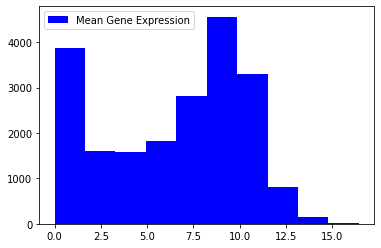

In [ ]:
plt.hist(mean_expression, bins = 10, color = 'b', label='Mean Gene Expression')
plt.legend()

Observations: 

*   We have just a few mean gene expression greater than 12.5.
*   Most of the mean gene expressions varies from 7.5 to 11.25.
*   Mean gene expressions from 0 to 1.25 is considerably a lot. (Most probably due to missing values)




###4. Which gene has the maximum mean expression?

In [ ]:
mean_expression.sort_values(ascending = False).head(10)

gene_230      16.430442
gene_5380     16.381964
gene_232      15.967993
gene_18570    15.777747
gene_6857     15.714588
gene_5388     15.658668
gene_1322     15.489623
gene_6698     15.356662
gene_15242    15.161160
gene_3371     15.069407
dtype: float64

Answer: gene_230 has the maximum mean expression.

###5. How many unique cancers do we have in the dataset?

In [ ]:
labels['Class'].nunique()

5

Answer: We have 5 unique cancers.

#K-means Clustering


##Part 1

In [ ]:
# It is better to normalize our data before clustering
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data.iloc[:,1:])
data.iloc[:,1:] = scaled_values

In [ ]:
data.head()

,Patients,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,0.323424,0.538556,0.091637,0.683650,0.0,0.478004,0.212979,0.0,0.0,0.048147,0.169230,0.421307,0.106683,0.0,0.0,0.0,0.0,0.054492,0.026015,0.186233,0.00000,0.626698,0.0,0.000000,0.290761,0.543929,0.869051,0.645785,0.670536,0.0,0.426832,0.549654,0.356653,0.542862,0.767682,0.000000,0.0,0.719787,...,0.219155,0.498652,0.535531,0.617740,0.000000,0.165197,0.499800,0.530872,0.718214,0.653184,0.367756,0.375051,0.241646,0.326209,0.143648,0.573065,0.317001,0.477265,0.000000,0.579837,0.0,0.443757,0.213868,0.682575,0.302288,0.800792,0.773580,0.330801,0.222081,0.401154,0.421592,0.346028,0.397941,0.784147,0.298401,0.633365,0.511542,0.213546,0.442221,0.0
1,sample_1,0.0,0.095034,0.261965,0.503271,0.406563,0.0,0.425094,0.000000,0.0,0.0,0.000000,0.074558,0.515630,0.181039,0.0,0.0,0.0,0.0,0.000000,0.799668,0.497254,0.00000,0.657372,0.0,0.000000,0.000000,0.750091,0.434989,0.114598,0.249798,0.0,0.000000,0.246504,0.099700,0.489260,0.331982,0.050609,0.0,0.638024,...,0.134153,0.340656,0.799032,0.412506,0.000000,0.221804,0.430108,0.443684,0.562101,0.111143,0.622325,0.538137,0.326852,0.101689,0.260559,0.461517,0.000000,0.211758,0.140192,0.574926,0.0,0.613275,0.376924,0.579041,0.590642,0.509966,0.772915,0.667101,0.544537,0.841640,0.353806,0.145807,0.404515,0.679510,0.105995,0.777134,0.720519,0.309838,0.141369,0.0
2,sample_2,0.0,0.563050,0.713649,0.365706,0.491410,0.0,0.448090,0.162862,0.0,0.0,0.000000,0.057404,0.414143,0.193615,0.0,0.0,0.0,0.0,0.154951,0.394714,0.585558,0.47041,0.534451,0.0,0.000000,0.144885,0.459611,0.685905,0.749215,0.083986,0.0,0.047539,0.570652,0.000000,0.169375,0.371345,0.038965,0.0,0.668811,...,0.391018,0.519374,0.460776,0.199532,0.000000,0.298835,0.362440,0.523675,0.577262,0.000000,0.437723,0.536388,0.485244,0.628635,0.344868,0.521125,0.000000,0.261897,0.137678,0.385483,0.0,0.512029,0.377333,0.637824,0.413930,0.372581,0.828488,0.463283,0.515544,0.802744,0.461958,0.327250,0.845362,0.586653,0.504772,0.000000,0.544738,0.449794,0.102625,0.0
3,sample_3,0.0,0.587397,0.743409,0.322208,0.602881,0.0,0.576451,0.156488,0.0,0.0,0.000000,0.055157,0.600847,0.000000,0.0,0.0,0.0,0.0,0.116682,0.408388,0.498780,0.00000,0.484557,0.0,0.000000,0.000000,0.295048,0.620317,0.631051,0.442704,0.0,0.133119,0.399376,0.581648,0.410794,0.543497,0.066170,0.0,0.675460,...,0.341961,0.347484,0.807674,0.414655,0.057083,0.289260,0.833621,0.627862,0.692476,0.561625,0.153726,0.468253,0.451793,0.781424,0.448077,0.649841,0.201068,0.376951,0.253043,0.622670,0.0,0.655935,0.337349,0.729016,0.671179,0.543433,0.872565,0.553492,0.445783,0.656360,0.655419,0.477651,0.555750,0.971253,0.423872,0.502650,0.522173,0.367733,0.254246,0.0
4,sample_4,0.0,0.425802,0.465334,0.298847,0.446039,0.0,0.388397,0.129896,0.0,0.0,0.000000,0.161818,0.447608,0.000000,0.0,0.0,0.0,0.0,0.081913,0.670699,0.414208,0.00000,0.431190,0.0,0.398593,0.000000,0.146411,0.491024,0.571768,0.509285,0.0,0.068209,0.207602,0.196279,0.523124,0.505353,0.000000,0.0,0.652807,...,0.351515,0.396511,0.770930,0.556155,0.047383,0.295804,0.539001,0.567034,0.697750,0.437536,0.821373,0.562626,0.627551,0.574990,0.500182,0.634983,0.040507,0.475133,0.112235,0.492678,0.0,0.449111,0.471864,0.622850,0.668229,0.417832,0.810804,0.546157,0.364523,0.669694,0.639042,0.499893,0.643439,0.

In [ ]:
data.max()

Patients      sample_99
gene_0                1
gene_1                1
gene_2                1
gene_3                1
                ...    
gene_20526            1
gene_20527            1
gene_20528            1
gene_20529            1
gene_20530            1
Length: 20532, dtype: object

In [ ]:
data.min()

Patients      sample_0
gene_0               0
gene_1               0
gene_2               0
gene_3               0
                ...   
gene_20526           0
gene_20527           0
gene_20528           0
gene_20529           0
gene_20530           0
Length: 20532, dtype: object

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse_list = [] #Create a list to track the values of sum squared error for each value of k

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4): # Run 4 more times. 
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse: # Take the best (minimum) sum squared error
    min_sse = sse

sse_list.append(min_sse)
min_sse

338863.9354664098

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4): 
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

307911.9827415481

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4):
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

264860.459870788

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4):
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

256013.23060162112

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4):
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

248769.3621094919

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4):
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

244808.46994797327

In [ ]:
kmeans = KMeans(n_clusters = 9, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])
min_sse = kmeans.inertia_

for epoch in range(4):
  kmeans.fit(data.iloc[:,1:])
  sse = kmeans.inertia_
  if sse < min_sse:
    min_sse = sse

sse_list.append(min_sse)
min_sse

241553.30161160041

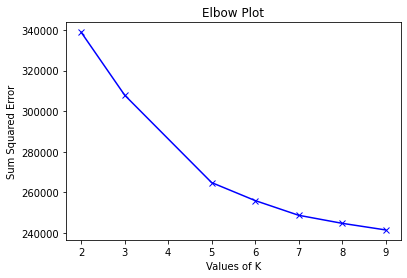

In [ ]:
num_of_clusters = [2,3,5,6,7,8,9]
plt.plot(num_of_clusters, sse_list, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum Squared Error')
plt.title('Elbow Plot')
plt.show()

###Conclusion
Optimal number of clusters should be 5 because the curve becomes 'relatively flatter' after this point.

##Part 2

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 5, 6, 7, 8, 9]
best_score = -1 # As silhouette score has a range of [-1,1]
best_cluster = 2

In [ ]:
for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state = 1, init = 'k-means++')
  cluster_labels = kmeans.fit_predict(data.iloc[:,1:])
  silhouette_avg = silhouette_score(data.iloc[:,1:], cluster_labels)

  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
  
  if silhouette_avg > best_score:
    best_score = silhouette_avg
    best_cluster = n_clusters

For n_clusters = 2 The average silhouette_score is : 0.13261275384549162
For n_clusters = 3 The average silhouette_score is : 0.1315251849641507
For n_clusters = 5 The average silhouette_score is : 0.17068205778667156
For n_clusters = 6 The average silhouette_score is : 0.1782755128160633
For n_clusters = 7 The average silhouette_score is : 0.1735886191013134
For n_clusters = 8 The average silhouette_score is : 0.13064199903449103
For n_clusters = 9 The average silhouette_score is : 0.11849603718193329


In [ ]:
 print("Best value of k =", best_cluster,
          "with the average silhouette_score of :", best_score)

Best value of k = 6 with the average silhouette_score of : 0.1782755128160633


###Conclusion
Does the best k (the optimal number of clusters) we have chosen match the true number of cancer types of the data?


> No, this does not match the true number of cancer types of the data as we have chosen 6 whereas the true number is 5. 





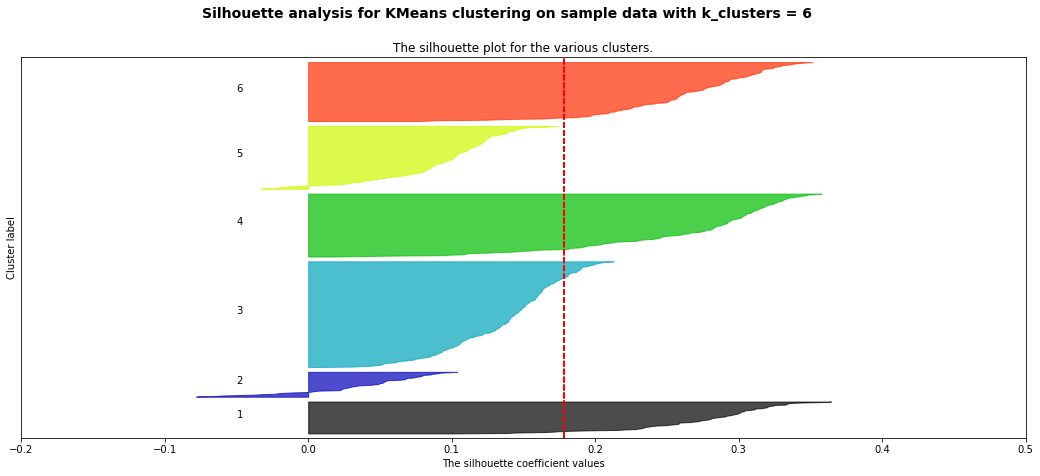

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

n_clusters = best_cluster
# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot

ax1.set_xlim([-0.2, 0.5])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(data.iloc[:,1:]) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state = 1, init = 'k-means++')
cluster_labels = clusterer.fit_predict(data.iloc[:,1:])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data.iloc[:,1:], cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data.iloc[:,1:], cluster_labels)

y_lower = 10
for i in range(n_clusters):
  # Aggregate the silhouette scores for samples belonging to
  # cluster i, and sort them
  ith_cluster_silhouette_values = \ sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with k_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold') 
plt.show()